## Testing the models on the Wheat-US data set

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

C:\Users\risha\AppData\Local\Temp\ipykernel_16632\3350823801.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#the start and end date
start_date = dt.datetime(2009,10,14)
end_date = dt.datetime(2018,3,12)

#loading from yahoo finance
# data = yf.download("GOOGL",start_date, end_date)
data = pd.read_csv(".\\Wheat-US.csv");
data.drop(columns=['high','low','close'],axis=1,inplace=True)
data.shape
# TO limit the display rows and columns in output
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
# print(data)
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")
data = data.sort_values(by='date')
data.set_index('date',inplace=True)
print(data)

              open
date              
2009-10-14  512.88
2009-10-15  513.50
...            ...
2018-03-09  499.25
2018-03-12  488.50

[2272 rows x 1 columns]


In [5]:
# Setting 80 percent data for training and remainning 20 % for testing
training_data_len = math.ceil(len(data) * .8)
# training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)
# print(train_data)


(1818, 1) (454, 1)


In [6]:
# Selecting Open Price values
dataset_train = train_data.open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1818, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train)
len(scaled_train)

[[0.16614201]
 [0.16734678]
 [0.15156815]
 ...
 [0.07772726]
 [0.06873033]
 [0.0711593 ]]


1818

In [8]:
# Selecting open price values
dataset_test = test_data.open.values
#reshaping 1d to 2d array
dataset_test = np.reshape(dataset_test,(-1,1))
#Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.43645662] [0.52833294] [0.52386551] [0.42252528] [0.4849518]


In [15]:
X_train = []
Y_train = []

for i in range(50,len(scaled_train)):
    X_train.append(scaled_train[i-50:i,0])
    Y_train.append(scaled_train[i,0])
    if i <= 51:
        print(X_train)
        print(Y_train)
        print()

[array([0.16614201, 0.16734678, 0.15156815, 0.13625588, 0.13625588,
       0.17511951, 0.17803428, 0.22272745, 0.24241188, 0.23318177,
       0.23318177, 0.19406552, 0.13285531, 0.12922156, 0.14962497,
       0.12873577, 0.13407951, 0.17585791, 0.18337803, 0.16468462,
       0.13699429, 0.13699429, 0.16322724, 0.18265905, 0.20014768,
       0.20160507, 0.2178695 , 0.2178695 , 0.25138937, 0.28588084,
       0.26767323, 0.26281528, 0.29559675, 0.29559675, 0.29342039,
       0.26815903, 0.27544596, 0.27544596, 0.28904823, 0.30919902,
       0.30410789, 0.28904823, 0.27544596, 0.25309937, 0.24824142,
       0.23195756, 0.21812211, 0.20403404, 0.21715052, 0.21495472])]
[0.21495472387392633]

[array([0.16614201, 0.16734678, 0.15156815, 0.13625588, 0.13625588,
       0.17511951, 0.17803428, 0.22272745, 0.24241188, 0.23318177,
       0.23318177, 0.19406552, 0.13285531, 0.12922156, 0.14962497,
       0.12873577, 0.13407951, 0.17585791, 0.18337803, 0.16468462,
       0.13699429, 0.13699429, 0.16

In [16]:
X_test = []
Y_test = []

for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i,0])
    Y_test.append(scaled_test[i,0])
    

In [17]:
# The data is converted to numpy array
X_train, Y_train = np.array(X_train),np.array(Y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))

In [20]:
# The data is converted to numpy array
X_test, Y_test = np.array(X_test), np.array(Y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
print("X_test :",X_test.shape,"Y_test :",Y_test.shape)


X_test : (404, 50, 1) Y_test : (404, 1)


In [21]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [35]:

# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								# decay=1e-6,
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, Y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0111
Epoch 2/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0031
Epoch 3/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0022
Epoch 4/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0020
Epoch 5/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0020
Epoch 6/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0017
Epoch 7/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0017
Epoch 8/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0015
Epoch 9/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0015
Epoch 10/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0014
Epoch 11/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0013
Epoch 12/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0012
Epoch 13/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 0.0012
Epoch 14/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0012
Epoch 15/20
884/884 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)            │      2,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)                │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [23]:

#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				Y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 3.0355e-04 - loss: 0.0043
Epoch 2/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.0021 - loss: 0.0015
Epoch 3/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 1.9841e-04 - loss: 0.0011
Epoch 4/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 1.6173e-04 - loss: 0.0011
Epoch 5/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.0013 - loss: 9.9585e-04
Epoch 6/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.0018 - loss: 9.0611e-04
Epoch 7/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.0023 - loss: 9.7042e-04
Epoch 8/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 5.9622e-04 - loss: 8.4200e-04
Epoch 9/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 5.9178e-04 - loss: 7.5657e-04
Epoch 10/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 9.9919e-04 - loss: 8.1646e-04
Epoch 11/12
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 50)            │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)                │     20,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 25)                │      1,275 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │         26 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [25]:

#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								# decay=1e-7,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,Y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - loss: 0.2174
Epoch 2/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - loss: 0.2179
Epoch 3/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - loss: 0.2134
Epoch 4/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - loss: 0.2212
Epoch 5/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - loss: 0.2229
Epoch 6/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - loss: 0.2263
Epoch 7/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - loss: 0.2223
Epoch 8/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - loss: 0.2262
Epoch 9/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - loss: 0.2194
Epoch 10/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - loss: 0.2258
Epoch 11/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - loss: 0.2239
Epoch 12/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - loss: 0.2233
Epoch 13/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - loss: 0.2229
Epoch 14/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - loss: 0.2243
E

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 50, 50)            │      7,950 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_5 (GRU)                     │ (None, 50, 50)            │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_6 (GRU)                     │ (None, 50, 50)            │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ gru_7 (GRU)                     │ (None, 50)                │     15,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [37]:

# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [38]:

# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

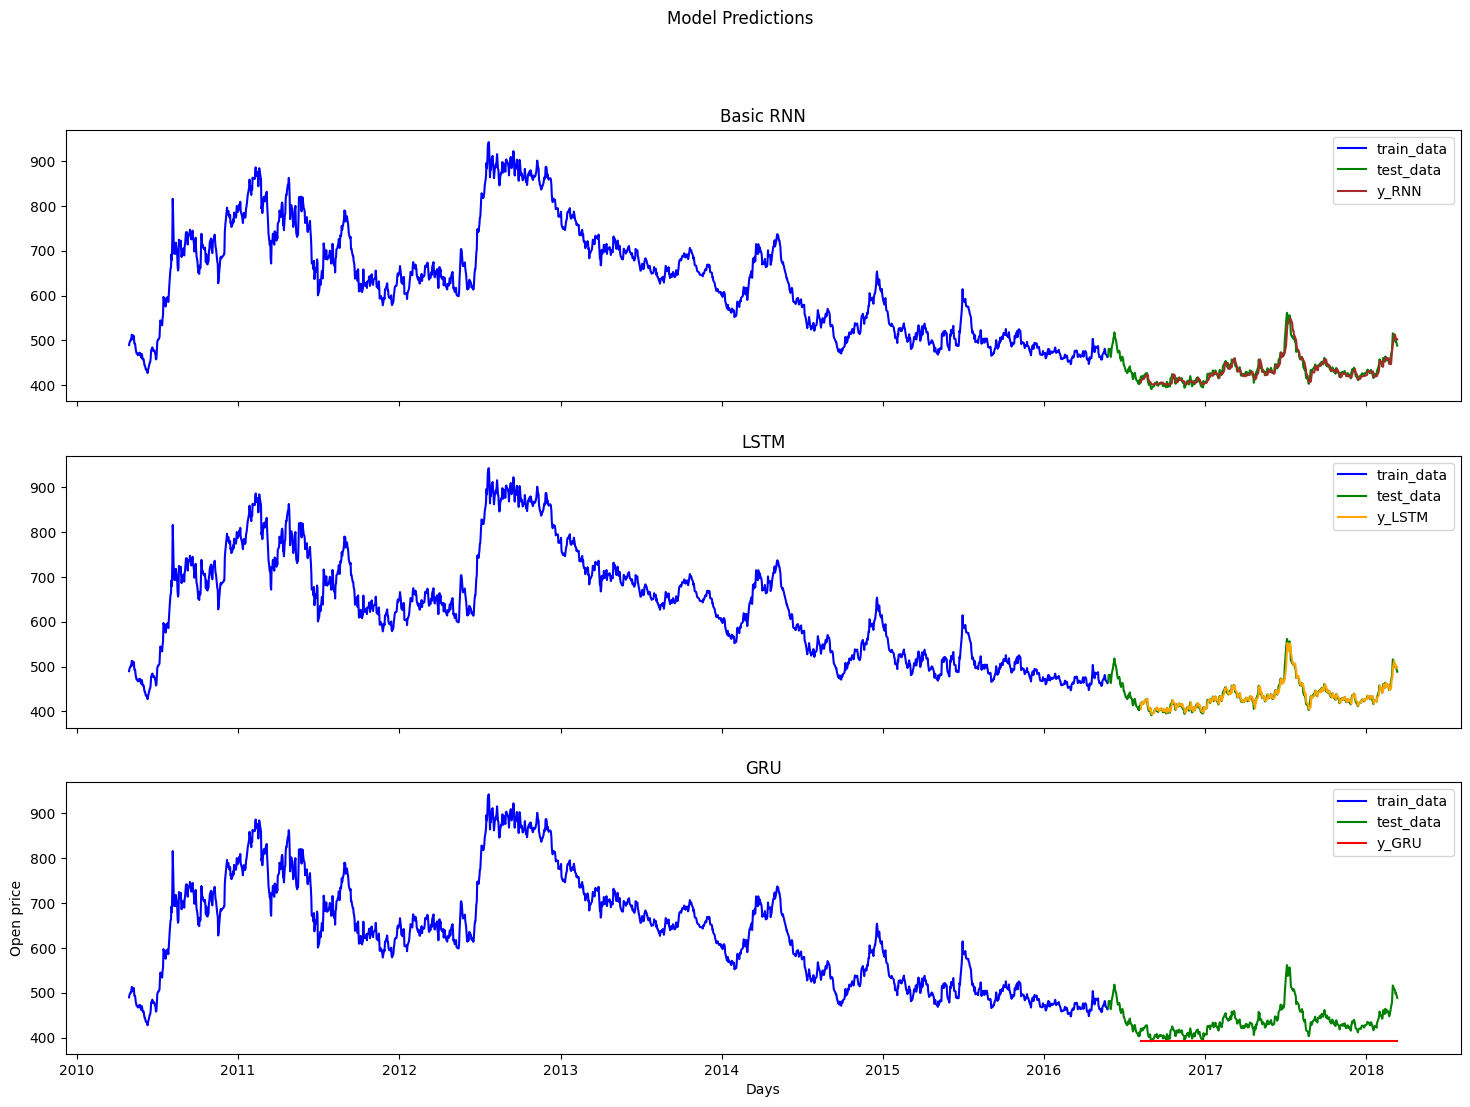

In [39]:

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
